<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/240909_%EA%B3%BC%EC%A0%9C_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER4. 모델 훈련**
**선형 회귀**
1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구한다.
2. 경사하강법(GD)라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다. 경사 하강법의 변종인 배치(batch) 경사 하강법, 미니배치(mini-batch) 경사 하강법, 확률적(stochastic) 경사 하강법(SGD)도 살펴본다.

**다항 회귀** : 비선형 데이터셋에 훈련시킬 수 있는 모델. 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과적합되기 쉽다.
1. 학습 곡선(learning curve)을 사용해 모델이 과적합되는지 감지하는 방법을 살펴보자.
2. 훈련 세트의 과적합을 감소시킬 수 있는 규제 기법을 알아보자.

**로지스틱 회귀, 소프트맥스 회귀**

## **4.1 선형 회귀**

$$삶의 만족도 = \theta_0 + \theta_1 \times 1인당GDP$$
이 모델은 입력 특성인 1인당_GDP에 대한 선형 함수이다. $\theta_0$와 $\theta_1$이 모델 파라미터이다.

더 일반적으로 선형 모델은 [식 4-1]에서처럼 입력 특성의 가중치 합과 편향(bias)(또는 절편(intercept))이라는 상수를 더해 예측을 만든다.

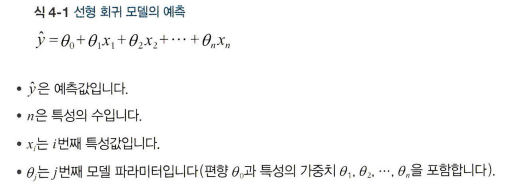

이 식은 [식 4-2]처럼 벡터 형태로 더 간단하게 쓸 수 있다.

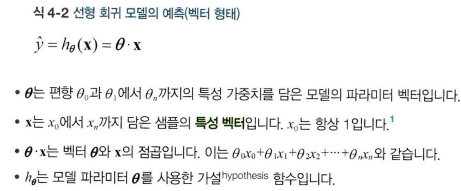

머신러닝에서는 종종 벡터를 하나의 열을 가진 2D 배열인 열 벡터(column vector)로 나타낸다. $\theta$와 x가 열 벡터라면 예측은 $\hat{y}=\theta'x$이다. 여기에서 $\theta'$는 $\theta$의 전치(transpose)이다(열 벡터가 아니라 행 벡터가 된다).

모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다. 회귀에서 가장 많이 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)이다. 그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 한다. 실제로는 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서(어떤 함수를 최소화하는 것은 그 함수의 제곱근을 최소화하는 것과 같으므로) 더 간단하다.

훈련 세트 x에 대한 선형 회귀 가설 $h_{\theta}$의 MSE는 [식 4-3]처럼 계산한다. 편의상 벡터 표현으로 모델 파라미터와 특성을 모두 표현하기 위해 편향 $\theta_{0}$에 가상의 특성 $x_{0}=1$이 곱해졌다고 생각한다. 최종 모델을 평가하는 데 사용하는 성능 측정 지표 말고 학습 알고리즘이 다른 함수를 최적화하는 경우가 종종 있다. 일반적으로 성능 측정 지표에는 없는 유용한 미분 특성이 있어서 이런 함수가 계산하기 더 쉽거나, 훈련하는 동안 모델에 제약을 가하기 위해 사용한다.

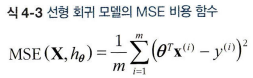

### **4.1.1 정규방정식**

비용 함수를 최소화하는 $\theta$ 값을 찾기 위한 해석적인 방법이 있다. 이를 정규방정식이라고 한다.

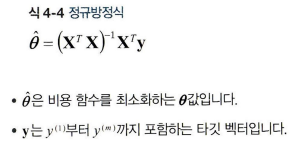

이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 생성한다.

In [ ]:
import numpy as np
X=2*np.random.rand(100, 1)
y=4+3*X+np.random.randn(100, 1)

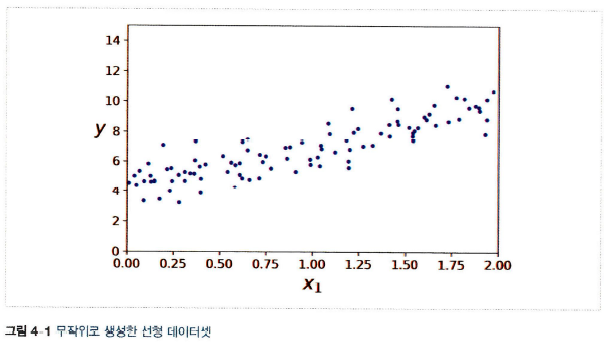

정규방정식을 사용해 $\hat{\theta}$을 계산해보자. 넘파이 선형대수 모듈(`np.linalg`)에 있는 `inv()` 함수를 사용해 역행렬을 계산하고 `dot()` 메서드를 사용해 행렬 곱셈을 한다.

In [ ]:
X_b=np.c_[np.ones((100, 1)), X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

이 데이터를 생성하기 위해 사용한 함수는 $y=4+3x_{1}+가우시안잡음$이다. 정규방정식으로 계산한 값을 확인해보자.

In [ ]:
theta_best

array([[3.97503556],
       [3.06599129]])

$\theta_0=4.215$와 $\theta_1=2.770$ 대신 $\theta_0=4$와 $\theta_1=3$을 기대했으나, 잡음 때문에 원래 함수의 파라미터를 정확히 재현하지 못했다.

$\hat{\theta}$을 사용해 예측 해보자.

In [ ]:
X_new=np.array([[0], [2]])
X_new_b=np.c_[np.ones((2, 1)), X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.97503556],
       [10.10701813]])

모델의 예측을 그래프에 나타내보자(그림 4-2).

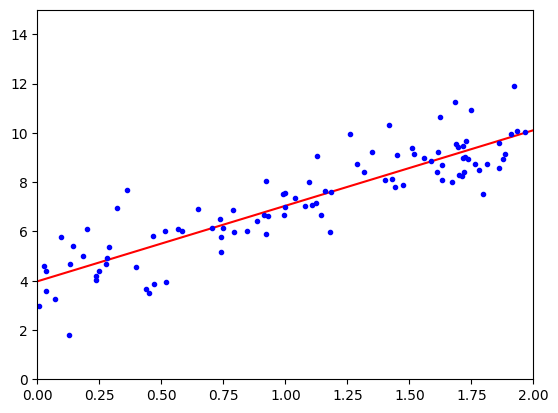

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

**선형 회귀**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

사이킷런은 특성의 가중치(`coef_`)와 편향(`intercept_`)을 분리하여 저장한다.

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([3.97503556]), array([[3.06599129]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.97503556],
       [10.10701813]])

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수('최소 제곱'에서 이름을 따옴)를 기반으로 한다. 이 함수를 직접 호출할 수도 있다.

In [ ]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97503556],
       [3.06599129]])

이 함수는 $\hat{\theta}-X^{+}y$를 계산한다. 여기에서 $X^{+}$는 X의 유사역행렬이다 (정확하게는 무어-펜로즈 역행렬이다). `np.linalg.pinv()` 함수를 사용해 유사역행렬을 직접 구할 수 있다.

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.97503556],
       [3.06599129]])

유사역행렬 자체는 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산된다. SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈 $U\Sigma^{+}V'$로 분해한다(`numpy.linalg.svd()` 참고). 유사역행렬은 $X^{+}=U\Sigma^{+}V'$로 계산된다. $\Sigma^{+}$를 계산하기 위해 알고리즘이 $\Sigma$를 먼저 구하고 그다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꾼다. 그다음 0이 아닌 모든 값을 역수로 치환한다. 마지막으로 만들어진 행렬을 전치한다. 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적이다. 또한 극단적인 경우도 처리할 수 있다. 실제로 m<n이거나 어떤 특성이 중복되어 행렬 $X^{T}X$의 역행렬이 없다면(즉, 특이 행렬이라면) 정규방정식이 작동하지 않는다. 하지만 유사역행렬은 항상 구할 수 있다.

### **4.1.2 계산 복잡도**
정규방정식은 $(n+1)\times(n+1)$ 크기가 되는 $X^{T}X$의 역행렬을 계산한다(n은 특성 수). 역행렬을 계산하는 계산 복잡도는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$ 사이다(구현 방법에 따라 차이가 있다). 다시 말해 특성 수가 두 배로 늘어나면 계산 시간이 대략 $2^{2.4}=5.3$에서 $2^3=8$배로 증가한다.

사이킷런의 `LinearRegression` 클래스가 사용하는 SVD 방법은 약 $O(n^2)$이다. 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 된다.

정규방정식과 SVD 방법 모두 특성 수가 많아지면 (예를 들어 100,000) 매우 느려진다. 다행인 것은 훈련 세트의 샘플 수에 대해서는 선형적으로 증가한다(둘 다 $O(m)$이다). 따라서 메모리 공간이 허락된다면 큰 훈련 세트도 효율적으로 처리할 수 있다.

또한 (정규방정식이나 다른 알고리즘으로) 학습된 선형 회귀 모델은 예측이 매우 빠르다. 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다. 다시 말해 예측하려는 샘플이 두 배로 늘어나면 (또는 특성이 두 배로 늘어나면) 걸리는 시간도 거의 두 배로 증가한다.

이제 아주 다른 방법으로 선형 회귀 모델을 훈련시켜보자. 이 방법은 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합하다.